# Evaluando modelos ML

In [56]:
# Se importan las librerías
#===========================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso, Ridge  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

# Se importa el dataset
df = pd.read_csv('https://raw.githubusercontent.com/santiago-giordano/datascienceproject/main/datasets/cause_of_deaths.csv')

In [57]:
df.reset_index(inplace=True)
# Se seleccionan datos de Argentina
stringlist = ["ARG"]
df_arg = df[df["Code"].str.contains("|".join(stringlist))]
df_arg = df_arg.drop(columns=["Country/Territory", "index"])
df_arg

,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
210,ARG,1990,772,4983,1494,1323,9,1128,2024,448,...,7096,7129,308,1277,4361,9894,5943,12140,627,107
211,ARG,1991,757,5161,1526,1323,9,1120,2007,433,...,7345,7261,305,1275,4502,10211,5895,12062,645,108
212,ARG,1992,732,5383,1594,1322,8,1108,2105,418,...,7741,7575,300,1272,4679,10766,5961,12201,667,105
213,ARG,1993,731,5609,1644,1303,8,1070,2123,406,...,8026,7788,293,1252,4843,11182,5859,12109,678,103
214,ARG,1994,698,5843,1670,1297,8,1047,2226,372,...,8190,7939,287,1246,4989,11440,5758,11961,682,104
215,ARG,1995,698,6142,1748,1369,7,1015,2173,388,...,8479,8372,286,1314,5082,12171,5806,12112,699,100
216,ARG,1996,693,6439,1818,1452,7,1022,2276,408,...,8693,8856,287,1392,5241,12775,5921,12313,727,93
217,ARG,1997,639,6749,1910,1585,7,1006,2179,396,...,9013,9620,287,1519,5383,13514,6021,12466,744,76
218,ARG,1998,638,7058,2013,1712,7,998,2055,404,...,9456,10446,277,1635,5537,14362,6085,12660,747,66
219,ARG,1999,616,7319,2082,1791,6,973,2169,423,...,9837,11112,280,1703,5556,14948,6100,12796,754,60


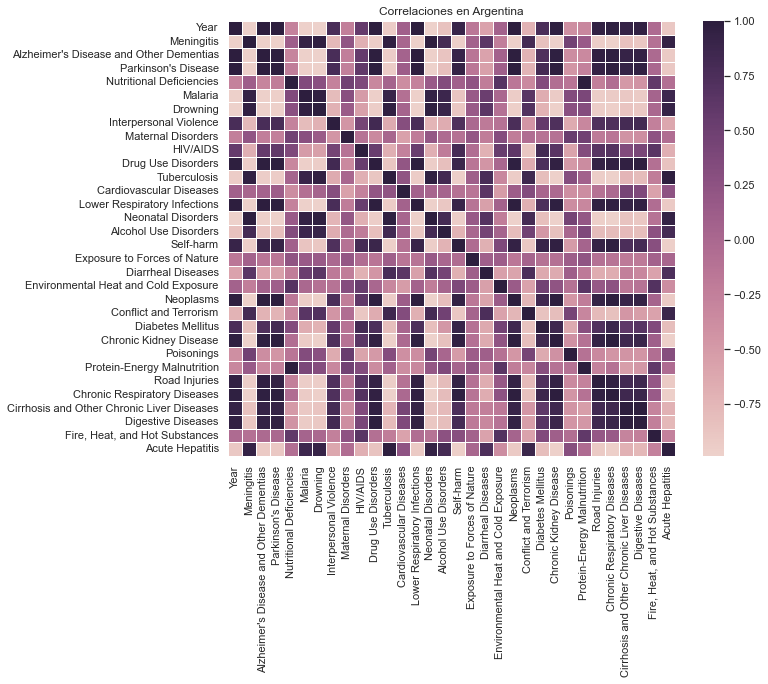

In [58]:
# Feature selection por método de correlación
plt.figure(figsize=(10,8))
sns.heatmap(data=df_arg.corr(), cmap=sns.cubehelix_palette(as_cmap=True), linewidth=.5)
plt.title("Correlaciones en Argentina")
plt.show()

### Linear Regression Model
* Tal como trabajamos en la parte II, la variable "Neoplasms" (Tumores) es una de las más significativas, por tal razón en principio entrenaremos los modelos con ésta.

In [59]:
# Se entrena el modelo con una variable
x = df_arg['Year'].values.reshape(-1, 1)
y = df_arg['Neoplasms'].values.reshape(-1, 1)

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [61]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train) #Creates model

LinearRegression()

Text(0.5, 0.98, 'Linear Regression Model')

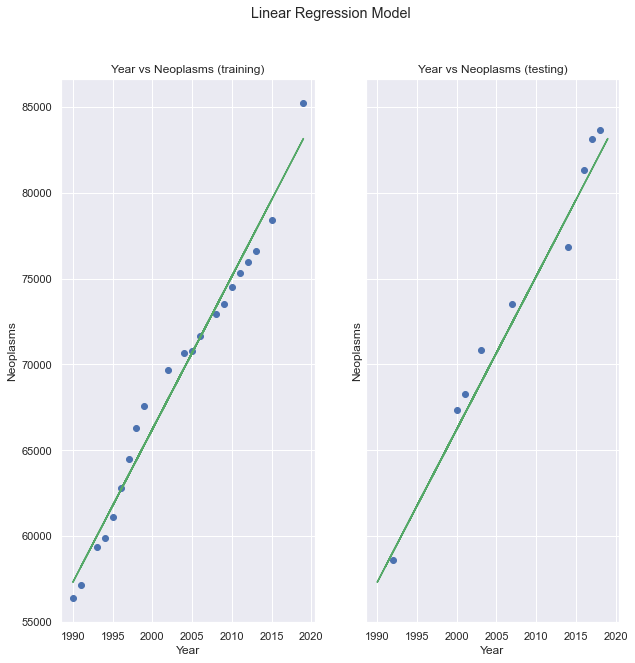

In [62]:
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharey=True)
ax[0].scatter(X_train, Y_train)
ax[0].plot(X_train, regressor.predict(X_train), c='g')
ax[0].set_title('Year vs Neoplasms (training)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Neoplasms')
ax[1].scatter(X_test, Y_test)
ax[1].plot(X_train, regressor.predict(X_train), c='g')
ax[1].set_title('Year vs Neoplasms (testing)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Neoplasms')
plt.suptitle('Linear Regression Model')

In [63]:
regressor.score(X_test, Y_test)

0.9698698244118578

Cuanto más cercano a 100% sea este valor, más precisas serán las predicciones.
* En segundo lugar, agregaremos la variable "Lower Respiratory Infections" (Infecciones Respiratorias Bajas) que también se encuentra entre las más significativas.

In [64]:
# En este caso con dos variables
xx = df_arg[['Neoplasms', 'Lower Respiratory Infections']].values
yy = df_arg['Year'].values.reshape(-1, 1)
XX_train, XX_test, YY_train, YY_test = train_test_split(xx, yy, test_size=0.3, random_state=0)
regressor.fit(XX_train, YY_train)
regressor.score(XX_test, YY_test)

0.9894416929951134

### Entrenando varios modelos para compararlos

* A partir de una variable - "Neoplasms" (Tumores) :

In [65]:
# Lista con los regresores
regresores = [ 
    KNeighborsRegressor()
    ,Lasso()
    ,LGBMRegressor(objective='regression', linear_tree=True)
    ,LinearRegression()
    ,MLPRegressor(max_iter=600, random_state=170162)
    ,RandomForestRegressor(criterion='absolute_error', random_state=170162) 
    ,Ridge()
    ,SVR(gamma='auto', kernel='rbf') 
    ,XGBRegressor()
    ]

In [66]:
# Se crea una lista para las métricas
error_metrics=[]

# Se itera sobre la lista de regresores
for regresor in regresores:
    
    # Se entrena el regresor con los conjuntos de training
    regresor.fit(X_train, Y_train)
    print("-------------",type(regresor).__name__,"----------------")
    print("Training score:",regresor.score(X_train,Y_train))
    print("Testing score:",regresor.score(X_test,Y_test))
        
    # Se predice con los valores de XX_test
    y_pred = regresor.predict(X_test)
    
    # Se calcula error
    error_metrics.append( {
                           'Regresor': type(regresor).__name__, 
                           'MAE': np.sqrt(mean_absolute_error((Y_test),(y_pred))),
                           'R2': np.sqrt(r2_score((Y_test),(y_pred))),
                           'MAPE': np.sqrt(mean_absolute_percentage_error((Y_test),(y_pred)))
                          }
                        )

    
# Se convierte la lista de métricas en un dataframe
metrics_df1 = pd.DataFrame.from_dict(error_metrics)
metrics_df1.head()

------------- KNeighborsRegressor ----------------
Training score: 0.9454628598860693
Testing score: 0.8845822698481649
------------- Lasso ----------------
Training score: 0.977585701593548
Testing score: 0.969867850378417
------------- LGBMRegressor ----------------
Training score: 0.0
Testing score: -0.3473937986801985
------------- LinearRegression ----------------
Training score: 0.9775857018501222
Testing score: 0.9698698244118578


C:\Users\GYOKU\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GYOKU\AppData\Local\Temp\ipykernel_22596\2272855213.py:20: RuntimeWarning: invalid value encountered in sqrt
  'R2': np.sqrt(r2_score((Y_test),(y_pred))),
C:\Users\GYOKU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GYOKU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GYOKU\AppData\Local\Temp\ipykernel_22596\22

------------- MLPRegressor ----------------
Training score: -1.2369942328521284
Testing score: -2.6766676992760985
------------- RandomForestRegressor ----------------
Training score: 0.9897541317481056
Testing score: 0.9554111061550501
------------- Ridge ----------------
Training score: 0.9775852395927911
Testing score: 0.9697854825834425
------------- SVR ----------------
Training score: -0.04503934258451703
Testing score: -0.14988667039480053
------------- XGBRegressor ----------------
Training score: 0.9999999995132144
Testing score: 0.9633573081262747


,Regresor,MAE,R2,MAPE
0,KNeighborsRegressor,43.910515,0.940522,0.155684
1,Lasso,35.882452,0.984819,0.131478
2,LGBMRegressor,86.903157,NaN,0.315853
3,LinearRegression,35.881556,0.984820,0.131475
4,MLPRegressor,115.922071,NaN,0.416885


<AxesSubplot:title={'center':'Comparación de regresores (MAE)'}, xlabel='Regresor'>

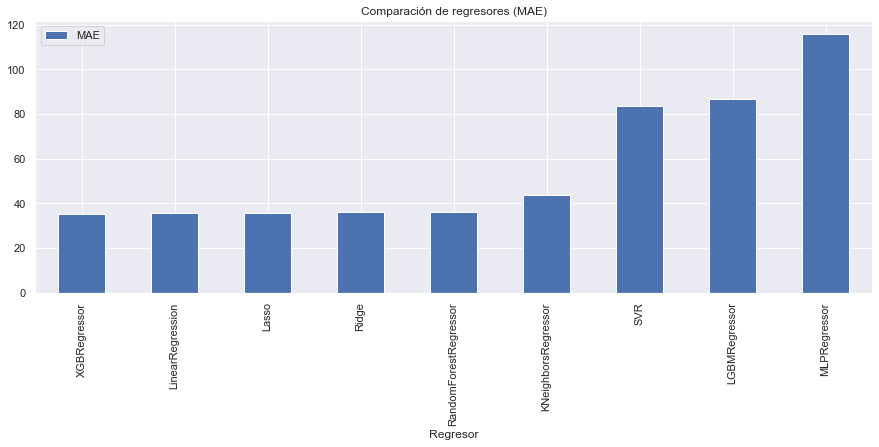

In [67]:
metrics_df1.sort_values('MAE')[['Regresor', 'MAE']].plot(figsize=(15,5)
                                                                       ,grid=True
                                                                       ,kind='bar'
                                                                       ,x='Regresor'
                                                                       ,title='Comparación de regresores (MAE)',
)

<AxesSubplot:title={'center':'Comparación de regresores (MAPE)'}, xlabel='Regresor'>

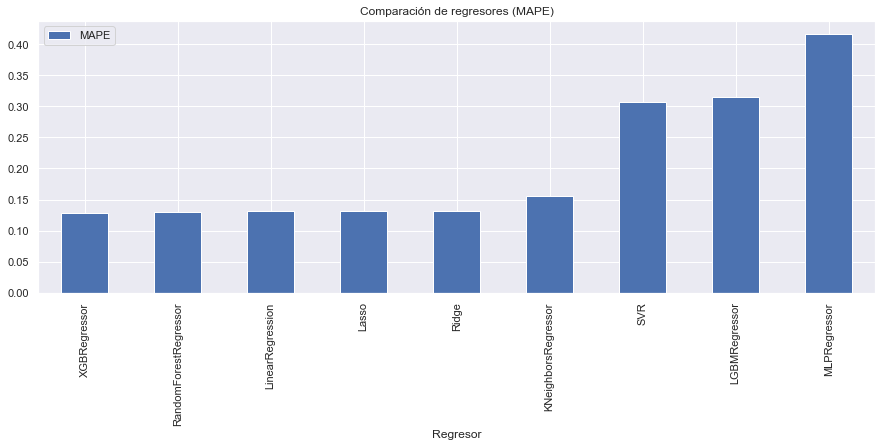

In [68]:
metrics_df1.sort_values('MAPE')[['Regresor', 'MAPE']].plot(figsize=(15,5)
                                                                       ,grid=True
                                                                       ,kind='bar'
                                                                       ,x='Regresor'
                                                                       ,title='Comparación de regresores (MAPE)',
)

<AxesSubplot:title={'center':'Comparación de regresores (R2)'}, xlabel='Regresor'>

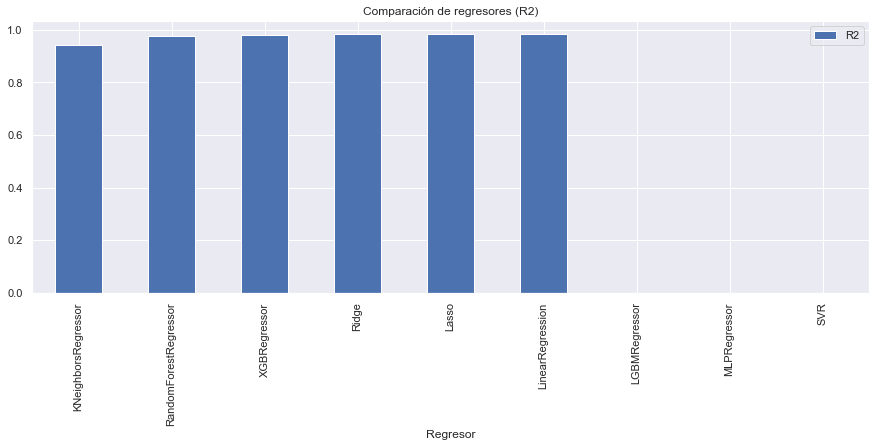

In [69]:
metrics_df1.sort_values('R2')[['Regresor', 'R2']].plot(figsize=(15,5)
                                                                       ,grid=True
                                                                       ,kind='bar'
                                                                       ,x='Regresor'
                                                                       ,title='Comparación de regresores (R2)',
)

In [70]:
metrics_df1.sort_values('MAE')[['Regresor','MAE','MAPE','R2']].style.set_properties(**{'text-align': 'left'})

,Regresor,MAE,MAPE,R2
8,XGBRegressor,35.419357,0.128098,0.981508
3,LinearRegression,35.881556,0.131475,0.984820
1,Lasso,35.882452,0.131478,0.984819
6,Ridge,35.919568,0.131609,0.984777
5,RandomForestRegressor,35.921272,0.129653,0.977451
0,KNeighborsRegressor,43.910515,0.155684,0.940522
7,SVR,83.779201,0.307166,nan
2,LGBMRegressor,86.903157,0.315853,nan
4,MLPRegressor,115.922071,0.416885,nan


* A partir de dos variables - "Neoplasms" (Tumores) y "Lower Respiratory Infections" (Infecciones Respiratorias Bajas):

In [71]:
# Se crea una lista para las métricas
error_metrics=[]

# Se itera sobre la lista de regresores
for regresor in regresores:
    
    # Se entrena el regresor con los conjuntos de training
    regresor.fit(XX_train, YY_train)
    print("-------------",type(regresor).__name__,"----------------")
    print("Training score:",regresor.score(XX_train,YY_train))
    print("Testing score:",regresor.score(XX_test,YY_test))
        
    # Se predice con los valores de XX_test
    y_pred = regresor.predict(XX_test)
    
    # Se calcula error
    error_metrics.append( {
                           'Regresor': type(regresor).__name__, 
                           'MAE': np.sqrt(mean_absolute_error((YY_test),(y_pred))),
                           'R2': np.sqrt(r2_score((YY_test),(y_pred))),
                           'MAPE': np.sqrt(mean_absolute_percentage_error((YY_test),(y_pred)))
                          }
                        )

    
# Se convierte la lista de métricas en un dataframe
metrics_df2 = pd.DataFrame.from_dict(error_metrics)
metrics_df2.head()

------------- KNeighborsRegressor ----------------
Training score: 0.9708788256111152
Testing score: 0.944647330257087
------------- Lasso ----------------
Training score: 0.995785391446619
Testing score: 0.9894359885300577
------------- LGBMRegressor ----------------
Training score: 0.0
Testing score: -0.2543453109655254
------------- LinearRegression ----------------
Training score: 0.9957854117000694
Testing score: 0.9894416929951134


C:\Users\GYOKU\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GYOKU\AppData\Local\Temp\ipykernel_22596\3372685903.py:20: RuntimeWarning: invalid value encountered in sqrt
  'R2': np.sqrt(r2_score((YY_test),(y_pred))),
C:\Users\GYOKU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------------- MLPRegressor ----------------
Training score: -25.22447051427645
Testing score: -77.86081230756697
------------- RandomForestRegressor ----------------
Training score: 0.9957052460842784
Testing score: 0.9887605306526036
------------- Ridge ----------------
Training score: 0.9957854117000696
Testing score: 0.9894416930305566
------------- SVR ----------------
Training score: 0.18952716429647887
Testing score: -0.17838002636782258


C:\Users\GYOKU\AppData\Local\Temp\ipykernel_22596\3372685903.py:20: RuntimeWarning: invalid value encountered in sqrt
  'R2': np.sqrt(r2_score((YY_test),(y_pred))),
C:\Users\GYOKU\AppData\Local\Temp\ipykernel_22596\3372685903.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regresor.fit(XX_train, YY_train)
C:\Users\GYOKU\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GYOKU\AppData\Local\Temp\ipykernel_22596\3372685903.py:20: RuntimeWarning: invalid value encountered in sqrt
  'R2': np.sqrt(r2_score((YY_test),(y_pred))),


------------- XGBRegressor ----------------
Training score: 0.9999999578672817
Testing score: 0.9689116182275995


,Regresor,MAE,R2,MAPE
0,KNeighborsRegressor,1.273665,0.971930,0.028390
1,Lasso,0.848905,0.994704,0.018936
2,LGBMRegressor,2.844283,NaN,0.063427
3,LinearRegression,0.848682,0.994707,0.018931
4,MLPRegressor,7.488113,NaN,0.166847


<AxesSubplot:title={'center':'Comparación de regresores (MAE)'}, xlabel='Regresor'>

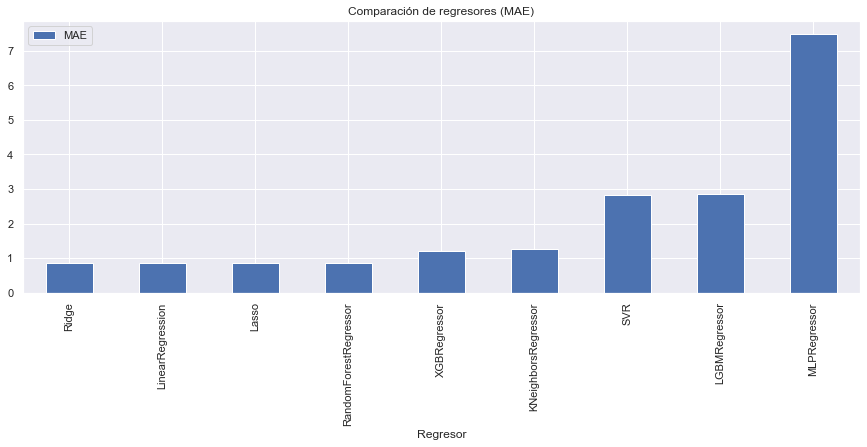

In [72]:
metrics_df2.sort_values('MAE')[['Regresor', 'MAE']].plot(figsize=(15,5)
                                                                       ,grid=True
                                                                       ,kind='bar'
                                                                       ,x='Regresor'
                                                                       ,title='Comparación de regresores (MAE)',
)

<AxesSubplot:title={'center':'Comparación de regresores (MAPE)'}, xlabel='Regresor'>

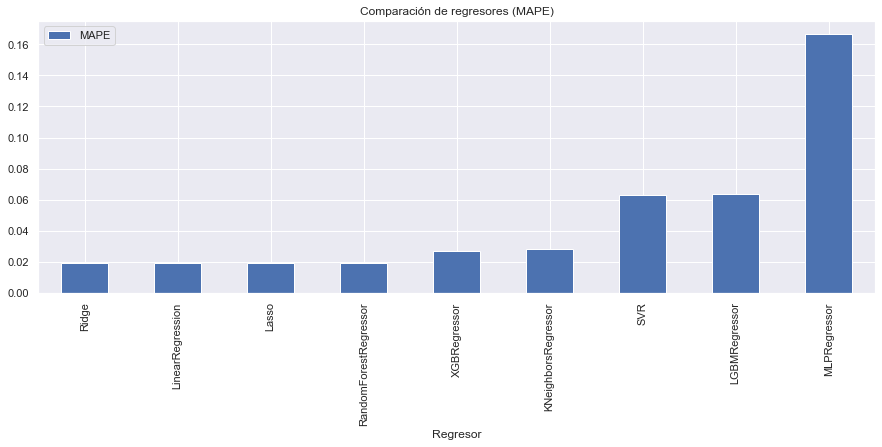

In [73]:
metrics_df2.sort_values('MAPE')[['Regresor', 'MAPE']].plot(figsize=(15,5)
                                                                       ,grid=True
                                                                       ,kind='bar'
                                                                       ,x='Regresor'
                                                                       ,title='Comparación de regresores (MAPE)',
)

<AxesSubplot:title={'center':'Comparación de regresores (R2)'}, xlabel='Regresor'>

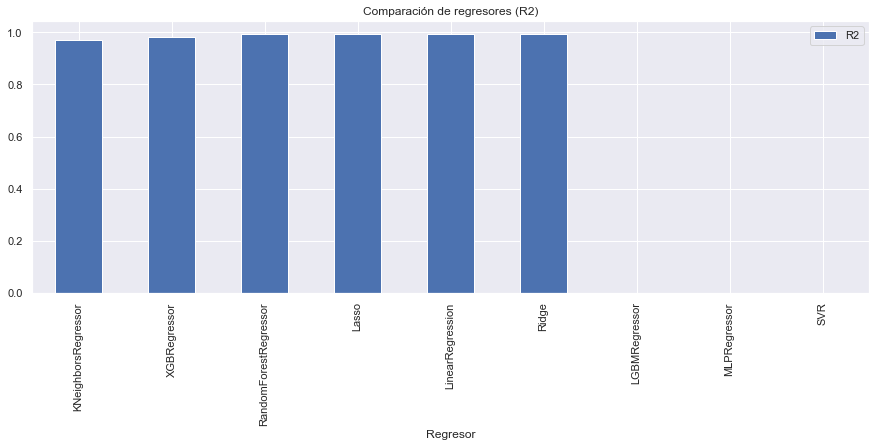

In [74]:
metrics_df2.sort_values('R2')[['Regresor', 'R2']].plot(figsize=(15,5)
                                                                       ,grid=True
                                                                       ,kind='bar'
                                                                       ,x='Regresor'
                                                                       ,title='Comparación de regresores (R2)',
)

In [75]:
metrics_df2.sort_values('MAE')[['Regresor','MAE','MAPE','R2']].style.set_properties(**{'text-align': 'left'})

,Regresor,MAE,MAPE,R2
6,Ridge,0.848682,0.018931,0.994707
3,LinearRegression,0.848682,0.018931,0.994707
1,Lasso,0.848905,0.018936,0.994704
5,RandomForestRegressor,0.853099,0.019040,0.994364
8,XGBRegressor,1.201337,0.026813,0.984333
0,KNeighborsRegressor,1.273665,0.028390,0.971930
7,SVR,2.830391,0.063128,nan
2,LGBMRegressor,2.844283,0.063427,nan
4,MLPRegressor,7.488113,0.166847,nan


* Luego de entrenar y testear varios modelos de regresión se observa que los modelos Ridge, LinearRegression, Lasso y RandomForestRegressor son los que mejores resultados arrojaron y que mejor se ajustaron. Vemos que el Error Absoluto Medio para estos da alrededor de 0.85 (0.853 a 0.848), que el Error Porcentual Absoluto Medio es menor al 0.02%, y que el R2 da 0.99, lo que indica un muy buen ajuste en los modelos, siendo muy fiables para la predicción.

## Underfitting y Overfitting:
#### Al seleccionar sólo los datos de Argentina la muestra se vuelve mucho más pequeña, en este sentido encontramos que puede haber riesgo de Underfitting. Sin embargo, en los modelos donde hemos visto mejores resultados observamos que la performance entre los datos de entrenamiento y los de prueba son acordes:
#### ------------- Ridge ----------------
#### Training score: 0.9957854117000696
#### Testing score: 0.9894416930305566
#### ------------- LinearRegression ----------------
#### Training score: 0.9957854117000694
#### Testing score: 0.9894416929951134
#### ------------- Lasso ----------------
#### Training score: 0.995785391446619
#### Testing score: 0.9894359885300577
#### ------------- RandomForestRegressor ----------------
#### Training score: 0.9957052460842784
#### Testing score: 0.9887605306526036



> ####  Una posible forma de mejorar el entrenamiento de los modelos sería ampliar la muestra, abarcando por ejemplo no sólo Argentina, sino también el resto de America Latina.